# 소규모 데이터셋에서 CNN 훈련

- 데이터셋 : [Dogs vs. Cats dataset](https://www.kaggle.com/c/dogs-vs-cats/data)
  - 2013년 강아지 고양이 캐글 경연 대회에서 사용
  - 25000개 강아지와 고양이 이미지(각 12500개) 압축파일
  - 이진 분류 문제
  - train dataset의 일부 사용

### Import module 

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow as tf

tf.__version__

'2.7.0'

- GPU 설정 확인

In [3]:
# GPU 설정 확인
print('GPU Information -', tf.test.gpu_device_name(), '\n')

!nvidia-smi

GPU Information - /device:GPU:0 

zsh:1: command not found: nvidia-smi


---

### 데이터 준비

- cats_and_dogs_small 폴더 아래 train, validation, test 폴더 생성
- 각 폴더별로 cats, dogs 폴더 생성하여 데이터 저장
    - train/cats : 1000개,
    - train/dogs : 1000개
    - validation/cats : 500개
    - validation/dogs : 500개
    - test/cats : 500개
    - test/dogs : 500개

In [5]:
import os, shutil

# 원본 데이터 압축 해제한 디렉토리 경로
original_dataset_dir = '../수업답안/datasets/cats_and_dogs/train'

# 소규모 데이터셋 저장 디렉토리
base_dir = '../수업답안/datasets/cats_and_dogs_small'

os.mkdir(base_dir)

# 훈련, 검증, 테스트 분할을 위한 디렉토리
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 훈련용 고양이/강아지 이미지 디렉토리
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 검증용 고양이/강아지 이미지 디렉토리
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 테스트용 고양이/강아지 이미지 디렉토리
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

In [6]:
# 1000개 고양이 이미지를 train_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500개 고양이 이미지를 validation_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 500개 고양이 이미지를 test_cats_dir에 복사
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


# 1000개 개 이미지를 train_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 500개 개 이미지를 validation_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 500개 개 이미지를 test_dogs_dir에 복사
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [7]:
# 저장된 파일 개수 확인
print('훈련용 고양이 이미지 전체 개수:', len(os.listdir(train_cats_dir)))
print('훈련용 개 이미지 전체 개수:', len(os.listdir(train_dogs_dir)))
print('검증용 고양이 이미지 전체 개수:', len(os.listdir(validation_cats_dir)))
print('검증용 개 이미지 전체 개수:', len(os.listdir(validation_dogs_dir)))
print('테스트용 고양이 이미지 전체 개수:', len(os.listdir(test_cats_dir)))
print('테스트용 개 이미지 전체 개수:', len(os.listdir(test_dogs_dir)))

훈련용 고양이 이미지 전체 개수: 1000
훈련용 개 이미지 전체 개수: 1000
검증용 고양이 이미지 전체 개수: 500
검증용 개 이미지 전체 개수: 500
테스트용 고양이 이미지 전체 개수: 500
테스트용 개 이미지 전체 개수: 500


### 디렉토리 설정

In [ ]:
# 앞의 이미지 데이터 폴더에 저장된 경우 폴더명만 지정하여 사용
# import os

# base_dir = './datasets/cats_and_dogs_small'

# train_dir = os.path.join(base_dir, 'train')
# validation_dir = os.path.join(base_dir, 'validation')
# test_dir = os.path.join(base_dir, 'test')

### 1. 네트워크 모델 구성

- Conv2D(relu 활성화 함수 사용) 4개
- MaxPooling2D 4개
- Flatten

In [8]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

- 모델 요약 보기

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


### 2. 모델 훈련 설정 및 컴파일

In [11]:
from tensorflow.keras.optimizers import RMSprop

optimizer = RMSprop(learning_rate=1e-04)

model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

### 3. 데이터 전처리

In [12]:
# ImageDataGenerator를 사용하여 디렉터리에서 이미지 읽기

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size = (150, 150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


### 4. 모델 훈련

#### 배치 제너레이터를 사용하여 모델 훈련
: fit_generator() 메서드
- fit 메서드와 동일

In [13]:
# 배치 제너레이터를 사용하여 모델 훈련

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=60,  
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/60
100/100 [==============================] - 12s 93ms/step - loss: 0.6873 - accuracy: 0.5385 - val_loss: 0.6691 - val_accuracy: 0.6030
Epoch 2/60
100/100 [==============================] - 8s 83ms/step - loss: 0.6551 - accuracy: 0.6190 - val_loss: 0.6342 - val_accuracy: 0.6430
Epoch 3/60
100/100 [==============================] - 8s 84ms/step - loss: 0.6084 - accuracy: 0.6660 - val_loss: 0.5980 - val_accuracy: 0.6760
Epoch 4/60
100/100 [==============================] - 8s 84ms/step - loss: 0.5646 - accuracy: 0.6975 - val_loss: 0.5839 - val_accuracy: 0.6920
Epoch 5/60
100/100 [==============================] - 8s 82ms/step - loss: 0.5358 - accuracy: 0.7310 - val_loss: 0.5859 - val_accuracy: 0.6810
Epoch 6/60
100/100 [==============================] - 8s 82ms/step - loss: 0.5147 - accuracy: 0.7375 - val_loss: 0.5803 - val_accuracy: 0.6720
Epoch 7/60
100/100 [==============================] - 9s 88ms/step - loss: 0.4830 - accuracy: 0.7580 - val_loss: 0.6732 - val_accuracy: 0.647

### 5. 학습 결과 시각화

- Accuracy Visualization

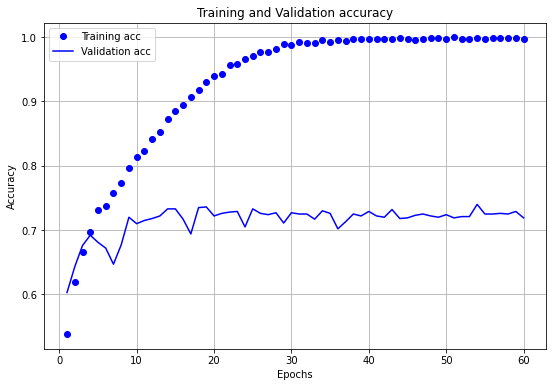

In [14]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid()
plt.legend()

- Loss Visualization

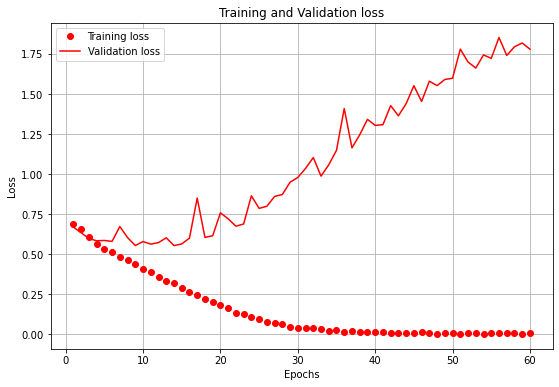

In [15]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

### 6. 모델 평가하기

In [16]:
test_datagen = ImageDataGenerator(rescale = 1./255)

test_generator = test_datagen.flow_from_directory(
                 test_dir,
                 target_size = (150, 150),
                 batch_size = 20,
                 class_mode = 'binary')

Found 1000 images belonging to 2 classes.


- Loss & Accuracy

In [17]:
loss, accuracy = model.evaluate(test_generator,
                                steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 2s 32ms/step - loss: 1.8377 - accuracy: 0.7330
Loss = 1.83768
Accuracy = 0.73300


### 7. Model Save & Load

- 모델 저장하기 : model.save()

In [18]:
model.save('./model/cats_and_dogs_small_1.h5')

- 모델 로드하기: load_model()

In [19]:
from tensorflow.keras.models import load_model

model_path = './model/cats_and_dogs_small_1.h5'
model_small = load_model(model_path)

In [20]:
loss, accuracy = model_small.evaluate(test_generator,
                                      steps = 50)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

50/50 [==============================] - 2s 35ms/step - loss: 1.8377 - accuracy: 0.7330
Loss = 1.83768
Accuracy = 0.73300
